In [1]:
import numpy as np
import pandas as pd
import time
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from tqdm import tqdm
import torch
import tenseal as ts

In [2]:
# def find_minimum(array):
#     # Find the minimum value excluding zeros
#     non_zero_values = array[array != 0]
#     if len(non_zero_values) > 0:
#         return np.min(non_zero_values)
#     else:
#         return None

# minimum = find_minimum(x)
# print(minimum)

In [4]:
df = pd.read_csv(r"C:\Users\invite1\Downloads\Manigandan Ramadasan\Code\top_feature_df.csv")
grouped = df.groupby('Label')
df = grouped.apply(lambda x: x.sample(grouped.size().min(), random_state=73).reset_index(drop=True))
x = df.drop(["Label"], axis = 1)
y = df["Label"]
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.QuantileTransformer()
# scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test_20, y_train, y_test_20 = train_test_split(x, y, test_size=0.20, random_state=42)
x_train=torch.from_numpy(x_train).float()
x_test_20=torch.from_numpy(x_test_20).float()
y_train=torch.from_numpy(np.array(y_train)).float().unsqueeze(1)
y_test_20=torch.from_numpy(np.array(y_test_20)).float().unsqueeze(1)
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test_20.shape}")
print(f"y_test shape: {y_test_20.shape}")

x_train shape: torch.Size([681185, 40])
y_train shape: torch.Size([681185, 1])
x_test shape: torch.Size([170297, 40])
y_test shape: torch.Size([170297, 1])


In [5]:
del grouped
del df
del x
del y

In [6]:
torch.random.manual_seed(73)
random.seed(73)

Loss at epoch 100: 0.3389948904514313
Loss at epoch 200: 0.31026074290275574
Loss at epoch 300: 0.29027795791625977
Loss at epoch 400: 0.2773754596710205
Loss at epoch 500: 0.2722761034965515
Loss at epoch 600: 0.26761260628700256
Loss at epoch 700: 0.26577574014663696
Loss at epoch 800: 0.26408708095550537
Loss at epoch 900: 0.2637783885002136
Loss at epoch 1000: 0.26298004388809204
Loss at epoch 1100: 0.2623240053653717
Loss at epoch 1200: 0.2619433104991913
Loss at epoch 1300: 0.26138409972190857
Loss at epoch 1400: 0.2587988078594208
Loss at epoch 1500: 0.2587374746799469
Loss at epoch 1600: 0.2580565810203552
Loss at epoch 1700: 0.2580120861530304
Loss at epoch 1800: 0.2578096389770508
Loss at epoch 1900: 0.25606560707092285
Loss at epoch 2000: 0.25435975193977356
Loss at epoch 2100: 0.2538470923900604
Loss at epoch 2200: 0.2536613643169403
Loss at epoch 2300: 0.2537945806980133
Loss at epoch 2400: 0.25350797176361084
Loss at epoch 2500: 0.2527654469013214
Loss at epoch 2600: 0.25

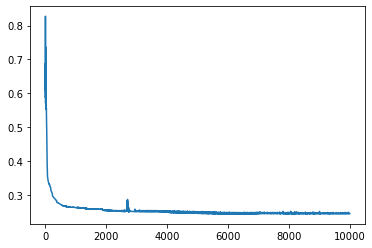

In [6]:
# Adam Optimizer
class LR(torch.nn.Module):

    def __init__(self, n_features):
        super(LR, self).__init__()
        self.lr = torch.nn.Linear(n_features, 1)
        
    def forward(self, x):
        out = torch.sigmoid(self.lr(x))
        return out
    
n_features = x_train.shape[1]
model = LR(n_features)
optim = torch.optim.Adam(model.parameters(), lr=0.5)
criterion = torch.nn.BCELoss()

EPOCHS = 10000

def train(model, optim, criterion, x, y, epochs=EPOCHS):
    loss_dict = {}
    for e in range(1, epochs + 1):
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optim.step()
        optim.zero_grad()
        loss_dict[e] = loss.data
        if e%100 == 0:
            print(f"Loss at epoch {e}: {loss.data}")
    return model, loss_dict

t_start = time.time()
model, loss_dict = train(model, optim, criterion, x_train, y_train)
t_end = time.time()
print(f"Training Time: {int(t_end - t_start)} seconds")

x_coord, y_coord = zip(*(loss_dict.items()))
plt.plot(x_coord,y_coord)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Loss at epoch 10: 0.46209266781806946
Loss at epoch 20: 0.37963390350341797
Loss at epoch 30: 0.3717210590839386
Loss at epoch 40: 0.3116186559200287
Loss at epoch 50: 0.28313931822776794
Loss at epoch 60: 0.2721050977706909
Loss at epoch 70: 0.2705861032009125
Loss at epoch 80: 0.2706872820854187
Loss at epoch 90: 0.2704334259033203
Loss at epoch 100: 0.2704344391822815
Loss at epoch 110: 0.270438015460968
Loss at epoch 120: 0.27090221643447876
Loss at epoch 130: 0.27132776379585266
Loss at epoch 140: 0.27145692706108093
Loss at epoch 150: 0.27142083644866943
Loss at epoch 160: 0.27057167887687683
Loss at epoch 170: 0.27043861150741577
Loss at epoch 180: 0.27030521631240845
Loss at epoch 190: 0.27030208706855774
Loss at epoch 200: 0.2701742947101593
Loss at epoch 210: 0.2700500190258026
Loss at epoch 220: 0.2699257433414459
Loss at epoch 230: 0.26992565393447876
Loss at epoch 240: 0.2699248194694519
Loss at epoch 250: 0.26992350816726685
Loss at epoch 260: 0.2699243724346161
Loss at e

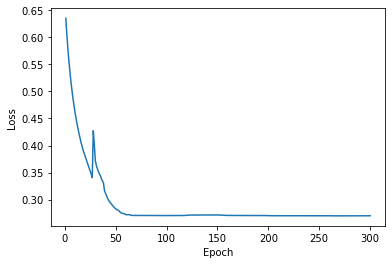

In [7]:
class LR(torch.nn.Module):

    def __init__(self, n_features):
        super(LR, self).__init__()
        self.lr = torch.nn.Linear(n_features, 1)
        
    def forward(self, x):
        out = torch.sigmoid(self.lr(x))
        return out
    
n_features = x_train.shape[1]
model = LR(n_features)
optimizer = torch.optim.LBFGS(model.parameters(), lr=0.001, max_iter=100)
criterion = torch.nn.BCELoss()

EPOCHS = 300

def train(model, optimizer, criterion, x, y, epochs=EPOCHS):
    loss_dict = {}
    for e in range(1, epochs + 1):
        def closure():
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            return loss

        optimizer.step(closure)
        loss_dict[e] = closure().item()
        if e%10 == 0:
            print(f"Loss at epoch {e}: {closure().item()}")
    return model, loss_dict

t_start = time.time()
model, loss_dict = train(model, optimizer, criterion, x_train, y_train)
t_end = time.time()
print(f"Training Time: {int(t_end - t_start)} seconds")

x_coord, y_coord = zip(*(loss_dict.items()))
plt.plot(x_coord,y_coord)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [8]:
def accuracy(model, x, y):
    t_start = time.time()
    out = model(x)
    t_end = time.time()
    print(f"Prediction Time: {(t_end - t_start)} seconds")
    out_list.append(out)
    correct = torch.abs(y - out) < 0.5
    return correct.float().mean(), out

out_list = []
plain_accuracy, op = accuracy(model, x_test_20, y_test_20)
print(f"Accuracy on plain test_set: {plain_accuracy}")

Prediction Time: 0.0020062923431396484 seconds
Accuracy on plain test_set: 0.9437277317047119


In [10]:
op_df = pd.DataFrame({
    "Original": op.squeeze().detach().numpy()})
op_df.head()

,Original
0,0.510277
1,0.776857
2,0.082351
3,0.999996
4,1.000000


In [11]:
op = op.squeeze().detach().numpy()
for i in range(len(op)):
    if op[i]<0.5:
        op[i] = 0
    else:
        op[i] = 1
y_test_temp = y_test_20.squeeze().numpy()
plain_accuracy = accuracy_score(y_test_temp, op)
plain_recall = recall_score(y_test_temp, op, average='binary')  
plain_f1 = f1_score(y_test_temp, op, average='binary')  
plain_precision = precision_score(y_test_temp, op, average='binary')  
print(f"Accuracy: {plain_accuracy}")
print(f"Recall: {plain_recall}")
print(f"Precision: {plain_precision}")
print(f"F1 - Score: {plain_f1}")

Accuracy: 0.9437277227432075
Recall: 0.9598642571129977
Precision: 0.9298698639486737
F1 - Score: 0.9446290207951742


In [12]:
class EncryptedLR:
    
    def __init__(self, torch_lr):
        self.weight = torch_lr.lr.weight.data.tolist()[0]
        self.bias = torch_lr.lr.bias.data.tolist()
        
    def forward(self, enc_x):
        enc_out = enc_x.dot(self.weight) + self.bias
        return enc_out
    
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)
    
    def encrypt(self, context):
        self.weight = ts.ckks_vector(context, self.weight)
        self.bias = ts.ckks_vector(context, self.bias)
        
    def decrypt(self, context):
        self.weight = self.weight.decrypt()
        self.bias = self.bias.decrypt()
        
eelr = EncryptedLR(model)

In [13]:
poly_mod_degree = 8192
coeff_mod_bit_sizes = [60, 40, 60]
ctx_eval = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
ctx_eval.global_scale = 2 ** 40
ctx_eval.generate_galois_keys()

In [14]:
eelr.encrypt(ctx_eval)

In [17]:
def encrypted_evaluation(model, enc_x_test, y_test):
    t_start = time.time()
    output_list = []
    correct = 0
    for enc_x, y in zip(enc_x_test, y_test):
        enc_out = model(enc_x)
        out = enc_out.decrypt()
        out = torch.tensor(out)
        out = torch.sigmoid(out)
        if torch.abs(out - y) < 0.5:
            correct += 1
        output_list.append(out)
    t_end = time.time()
    print(f"Evaluated test set of {len(enc_x_test)} entries in {int(t_end - t_start)} seconds")
    print(f"Score: {correct}/{len(enc_x_test)}")
    return correct / len(enc_x_test), output_list

In [18]:
y_pred_final = []
one_part = y_test_20.shape[0] // 20
for i in range(1, 21):
    if i==1:
        j = one_part
        temp_x_test = x_test_20[:j,]
        temp_y_test = y_test_20[:j,]
    elif i==20:
        j = one_part * (i-1)
        temp_x_test = x_test_20[j:,]
        temp_y_test = y_test_20[j:,]
    else:
        j = one_part * i
        if i == 1:
            k = one_part
        else:
            k = one_part * (i-1)
        temp_x_test = x_test_20[k:j,]
        temp_y_test = y_test_20[k:j,]
    
    t_start = time.time()
    enc_x_test = []
    print(f"Starting Batch {i} Encryption")
    for x in tqdm(range(len(temp_x_test))):
        enc_x_test.append(ts.ckks_vector(ctx_eval, temp_x_test[x].tolist()))
    t_end = time.time()
    print(f"Encryption of the test set took {int(t_end - t_start)} seconds")
    encrypted_accuracy, output_list = encrypted_evaluation(eelr, enc_x_test, temp_y_test)
    print(f"Batch {i} Encrypted Accuracy: {encrypted_accuracy}")
    y_pred = torch.cat(output_list)
    y_pred = y_pred.numpy()
    y_pred_final.extend(y_pred)

Starting Batch 1 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:29<00:00, 289.41it/s]


Encryption of the test set took 29 seconds
Evaluated test set of 8514 entries in 67 seconds
Score: 8033/8514
Batch 1 Encrypted Accuracy: 0.9435048155978388
Starting Batch 2 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 297.57it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 67 seconds
Score: 8066/8514
Batch 2 Encrypted Accuracy: 0.9473807845900869
Starting Batch 3 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 296.40it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 67 seconds
Score: 8032/8514
Batch 3 Encrypted Accuracy: 0.9433873619920131
Starting Batch 4 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 296.66it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 67 seconds
Score: 8050/8514
Batch 4 Encrypted Accuracy: 0.9455015268968757
Starting Batch 5 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 294.89it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8062/8514
Batch 5 Encrypted Accuracy: 0.9469109701667842
Starting Batch 6 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 295.93it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8009/8514
Batch 6 Encrypted Accuracy: 0.9406859290580221
Starting Batch 7 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 297.00it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8052/8514
Batch 7 Encrypted Accuracy: 0.9457364341085271
Starting Batch 8 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 295.28it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8025/8514
Batch 8 Encrypted Accuracy: 0.9425651867512332
Starting Batch 9 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 297.20it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8042/8514
Batch 9 Encrypted Accuracy: 0.9445618980502701
Starting Batch 10 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 296.33it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 67 seconds
Score: 8030/8514
Batch 10 Encrypted Accuracy: 0.9431524547803618
Starting Batch 11 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 296.58it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 67 seconds
Score: 8026/8514
Batch 11 Encrypted Accuracy: 0.942682640357059
Starting Batch 12 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 295.33it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8021/8514
Batch 12 Encrypted Accuracy: 0.9420953723279305
Starting Batch 13 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 295.61it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8049/8514
Batch 13 Encrypted Accuracy: 0.94538407329105
Starting Batch 14 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 295.48it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8006/8514
Batch 14 Encrypted Accuracy: 0.940333568240545
Starting Batch 15 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 296.29it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 7996/8514
Batch 15 Encrypted Accuracy: 0.939159032182288
Starting Batch 16 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 296.01it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8036/8514
Batch 16 Encrypted Accuracy: 0.943857176415316
Starting Batch 17 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 296.33it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8019/8514
Batch 17 Encrypted Accuracy: 0.9418604651162791
Starting Batch 18 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 296.76it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8058/8514
Batch 18 Encrypted Accuracy: 0.9464411557434813
Starting Batch 19 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:28<00:00, 295.84it/s]


Encryption of the test set took 28 seconds
Evaluated test set of 8514 entries in 66 seconds
Score: 8027/8514
Batch 19 Encrypted Accuracy: 0.9428000939628847
Starting Batch 20 Encryption


100%|█████████████████████████████████████████████████████████████████████████████| 8531/8531 [00:29<00:00, 293.87it/s]


Encryption of the test set took 29 seconds
Evaluated test set of 8531 entries in 67 seconds
Score: 8075/8531
Batch 20 Encrypted Accuracy: 0.9465478841870824


In [19]:
for i in range(len(y_pred_final)):
    if y_pred_final[i]<0.5:
        y_pred_final[i] = 0
    else:
        y_pred_final[i] = 1
y_test_temp = y_test_20.squeeze().numpy()
enc_accuracy = accuracy_score(y_test_temp, y_pred_final)
enc_recall = recall_score(y_test_temp, y_pred_final, average='binary')
enc_f1 = f1_score(y_test_temp, y_pred_final, average='binary')
enc_precision = precision_score(y_test_temp, y_pred_final, average='binary')
print(f"Accuracy: {enc_accuracy}")
print(f"Recall: {enc_recall}")
print(f"Precision: {enc_precision}")
print(f"F1 - Score: {enc_f1}")

Accuracy: 0.9437277227432075
Recall: 0.9598642571129977
Precision: 0.9298698639486737
F1 - Score: 0.9446290207951742
